In [67]:
from libs.utils import crop_and_normalize
from libs.utils import create_target_landmarks
from libs.dp import Dataset
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [127]:
def color_augmentation(src, saturation, contrast, brightness):
    hsv = cv2.cvtColor(src, cv2.COLOR_RGB2HSV)
    h, s, v = cv2.split(hsv)
    i = saturation
    s = s * i
    s = np.clip(s, 0, 255)
    s = np.ndarray.astype(s, 'uint8')

    merged = cv2.merge([h, s, v])
    dst = cv2.cvtColor(merged, cv2.COLOR_HSV2RGB)

    a = contrast
    b = brightness
    dst = dst.astype(np.float32)
    dst = dst * a + b
    dst = np.clip(dst, 0., 255.)
    dst = dst.astype(np.uint8)

    return dst

def rotate(image, kps, center, angle):
    src = image
    # print(f'angle: {angle}')
    height, width, channel = src.shape
    matrix = cv2.getRotationMatrix2D(tuple(center), -angle, 1)
    dst = cv2.warpAffine(src, matrix, (width, height))
    rotated_landmarks = rotate_landmarks(kps, angle, center)

    return dst, rotated_landmarks
    
def rotate_landmarks(landmarks, angle, center):
    radian = np.radians(angle)
    rotated_landmarks = []
    for i in landmarks:
        _x = i[0] - center[0]
        _y = i[1] - center[1]
        x = _x * np.cos(radian) - _y * np.sin(radian)
        y = _x * np.sin(radian) + _y * np.cos(radian)
        x += center[0]
        y += center[1]
        rotated_landmarks.append([x, y])

    return np.array(rotated_landmarks, dtype='float32')

In [121]:
scale = 256
dataset = Dataset(256, scale, 68, '../Datasets/300W_train/train.csv')
rotation = [-5., 5.]
saturation = [0.6, 1.4]
contrast = [0.8, 1.2]
brightness = [-20, 20]

Train dataset: ../Datasets/300W_train/train.csv
Train dataset is loaded. Shape: (3837, 2)
scale: 4.0


184.0
127


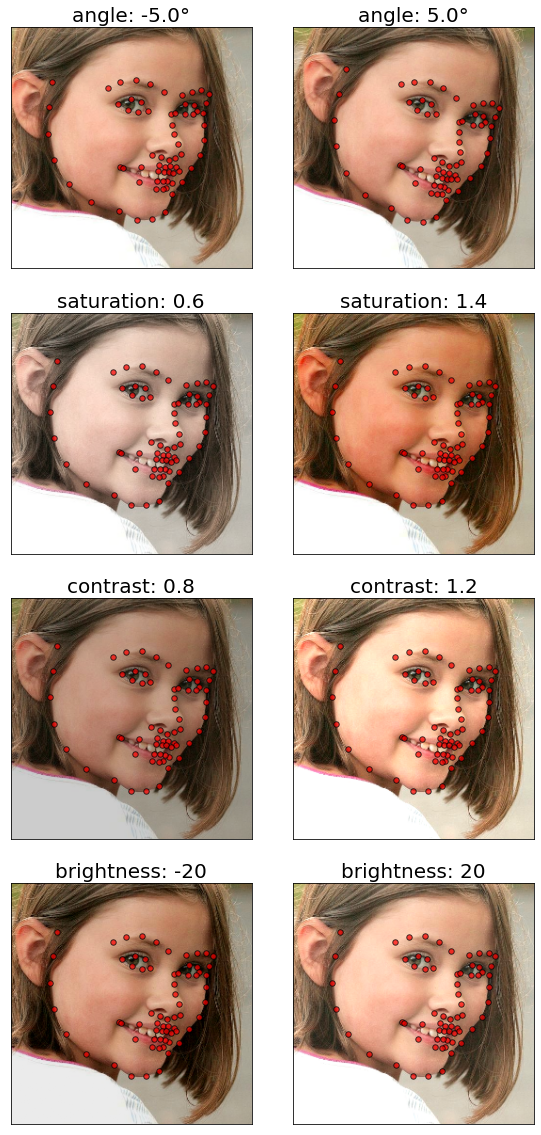

In [195]:
fig, ax = plt.subplots(4, 2, figsize=(8,16))
fig.tight_layout()

fontsize=20
size=30
alpha=0.7
linewidth=1

idx = 2167
image_file, label_file = dataset.train_list[idx]
orig_img = dataset.get_img(image_file)
orig_kps, center, scale = dataset.get_label(label_file)

for i, r in enumerate(rotation):
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    rotated_img, rotated_kps = rotate(orig_img, orig_kps, center, r)
    augmented_img = color_augmentation(rotated_img, 1, 1, 0)
    cropped_img = crop_and_normalize(augmented_img, center, scale)
    cropped_kps = create_target_landmarks(rotated_kps, center, scale, 256)

    ax[0, i].get_xaxis().set_visible(False)
    ax[0, i].get_yaxis().set_visible(False)
    ax[0, i].set_title(f'angle: {r}°', fontsize=fontsize)
    ax[0, i].imshow(cropped_img)
    ax[0, i].scatter(cropped_kps[:,0], cropped_kps[:,1], c='red', alpha=alpha, s=size, edgecolor='black', linewidth=linewidth)
    
for i, s in enumerate(saturation):
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    rotated_img, rotated_kps = rotate(orig_img, orig_kps, center, 0)
    augmented_img = color_augmentation(rotated_img, s, 1, 0)
    cropped_img = crop_and_normalize(augmented_img, center, scale)
    cropped_kps = create_target_landmarks(rotated_kps, center, scale, 256)

    ax[1, i].get_xaxis().set_visible(False)
    ax[1, i].get_yaxis().set_visible(False)
    ax[1, i].set_title(f'saturation: {s}', fontsize=fontsize)
    ax[1, i].imshow(cropped_img)
    ax[1, i].scatter(cropped_kps[:,0], cropped_kps[:,1], c='red', alpha=alpha, s=size, edgecolor='black', linewidth=linewidth)

for i, c in enumerate(contrast):
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    rotated_img, rotated_kps = rotate(orig_img, orig_kps, center, 0)
    augmented_img = color_augmentation(rotated_img, 1, c, 0)
    cropped_img = crop_and_normalize(augmented_img, center, scale)
    cropped_kps = create_target_landmarks(rotated_kps, center, scale, 256)

    ax[2, i].get_xaxis().set_visible(False)
    ax[2, i].get_yaxis().set_visible(False)
    ax[2, i].set_title(f'contrast: {c}', fontsize=fontsize)
    ax[2, i].imshow(cropped_img)
    ax[2, i].scatter(cropped_kps[:,0], cropped_kps[:,1], c='red', alpha=alpha, s=size, edgecolor='black', linewidth=linewidth)

for i, b in enumerate(brightness):
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    rotated_img, rotated_kps = rotate(orig_img, orig_kps, center, 0)
    augmented_img = color_augmentation(rotated_img, 1, 1, b)
    cropped_img = crop_and_normalize(augmented_img, center, scale)
    cropped_kps = create_target_landmarks(rotated_kps, center, scale, 256)

    ax[3, i].get_xaxis().set_visible(False)
    ax[3, i].get_yaxis().set_visible(False)
    ax[3, i].set_title(f'brightness: {b}', fontsize=fontsize)
    ax[3, i].imshow(cropped_img)
    ax[3, i].scatter(cropped_kps[:,0], cropped_kps[:,1], c='red', alpha=alpha, s=size, edgecolor='black', linewidth=linewidth)
     
fig.savefig(f'plot_{idx}.jpg')